# Análise de Personalidade de Consumo
***Projeto final de disciplina - Ciência de Dados e Inteligência Artificial***

**Desenvolvedores**

Fabio Gustavo Gomes Vaz | RA: 00282997 <br>
Felipe Fernandes Rojas | RA: 00282999 <p>

**Professor orientador**

Jefferson de Oliveira Silva <p>

## Objetivo de negócio
Identificar comunidades de potenciais clientes para traçar estratégias personalizadas a cada público.

## Metodologia
Utilizando um conjunto de dados de 2240 clientes de uma empresa, aplicaremos métodos estatísticos para analisar a personalidade do cliente, modelar predições de comportamento e agrupar em comunidades para aprimorar as estratégias de marketing a cada público específico. Esses públicos serão definidos por meio de um algoritmo de aprendizagem de máquina não-supervisionada, denominado *k-means*, e posteriormente serão treinados modelos de aprendizagem de máquina supervisionada: árvore de decisão (também conhecido como *Decision Tree*) e *SVM (Support Vector Machine)*, capazes de prever o grupo de novos indivíduos.

## Atributos do conjunto de dados

***Pessoais***

`ID`: identificador único do cliente; <br>
`idade`: idade do cliente em 2015; <br>
`educação`: nível de educação do cliente; <br>
`estado civil`: estado civil do cliente; <br>
`renda`: renda familiar anual do cliente; <br>
`crianças em casa`: número de crianças na casa do cliente; <br>
`adolescentes em casa`: número de adolescentes na casa do cliente; <br>
`crianças e adolescentes`: soma de crianças e adolescentes na casa do cliente; <br>
`inscrição`: data de inscrição do cliente na empresa; <br>
`última compra`: número de dias desde a última compra do cliente; e <br>
`reclamação`: 1 se o cliente reclamou nos últimos dois anos, 0 caso contrário. <p>

***Produtos***

`gasto em vinhos`: quantia gasta em vinhos nos últimos dois anos <br>
`gasto em frutas`: quantia gasta com frutas nos últimos dois anos; <br>
`gasto em carnes`: quantia gasta com carnes nos últimos dois anos; <br>
`gasto em frutas`: quantia gasta em peixes nos últimos dois anos; <br>
`gasto em doces`: quantia gasta em doces nos últimos dois anos; <br>
`gasto em ouro`: quantia gasta em ouro nos últimos dois anos; e <br>
`gasto total`: quantia total gasta nos produtos acima nos últimos dois anos. <p>

***Promoção***

`compras c/ desconto`: número de compras feitas com desconto; <br>
`aceitou - 1`: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário;<br>
`aceitou - 2`: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário; <br>
`aceitou - 3`: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário; <br>
`aceitou - 4`: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário; <br>
`aceitou - 5`: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário; e <br>
`resposta final`: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário. <p>

***Lugar***

`compras pela web`: número de compras feitas através do site da empresa; <br>
`compras c/ catálogo`: número de compras feitas usando um catálogo; <br>
`compras na loja física`: número de compras feitas diretamente nas lojas; <br>
`total de compras`: número total de compras feitas pelo cliente; e <br>
`visitas no site`: Número de visitas ao site da empresa no último mês. <p>

***Classe predita***

`grupo`: identificação do grupo ao qual o cliente pertence, de acordo com o modelo classificador treinado neste projeto.


## Processo de automatização

In [ ]:
import pandas as pd # para visualização, manipulação e análise de dados

def criar_dataframe(endereco, delimitador):
  """ Função que lê arquivo em .csv com a biblioteca pandas e o armazena na variável desejada.

      endereço: inserir string do local em que o arquivo está armazenado;
      delimitador: inserir string do delimitador deste arquivo .csv;
  """
  return pd.read_csv(endereco, delimiter=delimitador)

In [ ]:
def traducao_atributos(dataframe):
  """ Função para traduzir os nomes dos atributos do Dataframe para o Português-brasileiro. 
  Basta aplicá-la no dataset deste projeto.

      dataframe: inserir variável contendo o nome do DataFrame.
  """

  return dataframe.rename(columns={
      'Year_Birth': 'ano de nascimento',
      'Education': 'educação',
      'Marital_Status': 'estado civil',
      'Income': 'renda',
      'Kidhome': 'crianças',
      'Teenhome': 'adolescentes',
      'Dt_Customer': 'inscrição',
      'Recency': 'última compra',
      'MntWines': 'gasto em vinhos',
      'MntFruits': 'gasto em frutas',
      'MntMeatProducts': 'gasto em carnes',
      'MntFishProducts': 'gasto em peixes',
      'MntSweetProducts': 'gasto em doces',
      'MntGoldProds': 'gasto em ouro',
      'NumDealsPurchases': 'compras c/ desconto',
      'NumWebPurchases': 'compras pela web',
      'NumCatalogPurchases': 'compras c/ catálogo',
      'NumStorePurchases': 'compras na loja física',
      'NumWebVisitsMonth': 'visitas no site',
      'AcceptedCmp3': 'aceitou - 3',
      'AcceptedCmp4': 'aceitou - 4',
      'AcceptedCmp5': 'aceitou - 5',
      'AcceptedCmp1': 'aceitou - 1',
      'AcceptedCmp2': 'aceitou - 2',
      'Complain': 'reclamação',
      'Response': 'resposta final',
      'Z_CostContact': 'custo do contato',
      'Z_Revenue': 'receita' })

In [ ]:
def traducao_dados(dataframe):
  """ Função para traduzir todos os dados do Dataframe para o Português-brasileiro. 
  Basta aplicá-la no dataset deste projeto.

      dataframe: inserir variável contendo o nome do DataFrame.
  """

  return dataframe.replace({
      
      # 'educação'
      'Graduation': 'graduação',
      'PhD': 'doutorado',
      'Master': 'mestrado',
      '2n Cycle': 'segundo ciclo',
      'Basic': 'básico completo',

      # 'estado civil'
      'Married': 'casado(a)',
      'Together': 'união estável',
      'Single': 'solteiro(a)',
      'Divorced': 'divorciado(a)',
      'Widow': 'viúvo(a)',
      'Alone': 'solteiro(a)',
      'YOLO': 'solteiro(a)',
      'Absurd': 'solteiro(a)' })

In [ ]:
def traduzir(dataframe):
  """ Função que traduz o DataFrame através da composição das funções de tradução dos 
  atributos e dos dados. Basta aplicá-la no dataset deste projeto.

      dataframe: inserir variável contendo o nome do DataFrame.
  """

  dataframe = traducao_atributos(dataframe)
  dataframe = traducao_dados(dataframe)
  return dataframe

In [ ]:
def preencher_nulos(dataframe, atributo, metodo):
  """ Função que preenche todos os valores nulos de uma coluna por algum método estatístico 
  aplicado aos valores existentes naquela coluna.
  
      dataframe: inserir variável contendo o nome do DataFrame;
      atributo: inserir string contendo o nome da coluna do DataFrame a ter seus valores 
  nulos preenchidos;
      metodo ('Média', 'Moda', 'Máximo', 'Mínimo', 'Mediana'): inserir string contendo o 
  método estatístico a ser aplicado aos valores existentes para preenchimento dos valores nulos,
  conforme opções indicadas entre parênteses.
  """

  # Definição de um DataFrame sem os valores nulos, para aplicar o método estatístico sem prejuízos que os próprios causariam
  sem_nulos = dataframe.dropna()

  # Definição da coluna no DataFrame sem valores nulos
  coluna_tratada = sem_nulos[atributo]

  if metodo == 'Média':
    # Cálculo da média na coluna tratada
    media = coluna_tratada.mean()
    # Substituição dos valores nulos pela média
    return dataframe[atributo].fillna(media, inplace=True)

  elif metodo == 'Moda':
    # Cálculo da moda na coluna tratada
    moda = coluna_tratada.mode()
    # Substituição dos valores nulos pela moda
    return dataframe[atributo].fillna(moda, inplace=True)

  elif metodo == 'Máximo':
    # Cálculo do valor máximo na coluna tratada
    maximo = coluna_tratada.max()
    # Substituição dos valores nulos pelo valor máximo
    return dataframe[atributo].fillna(maximo, inplace=True)

  elif metodo == 'Mínimo':
    # Cálculo do valor mínimo na coluna tratada
    minimo = coluna_tratada.min()
    # Substituição dos valores nulos pelo valor mínimo
    return dataframe[atributo].fillna(minimo, inplace=True)

  elif metodo == 'Mediana':
    # Cálculo da mediana na coluna tratada
    mediana = coluna_tratada.median()
    # Substituição dos valores nulos pela mediana
    return dataframe[atributo].fillna(mediana, inplace=True)

In [ ]:
def filtrar(dataframe, atributo, classificacao):
  """ Função para filtrar o DataFrame para mostrar apenas as instâncias com uma classificação 
  única desejada em um determinado atributo.

      dataframe: inserir variável contendo o nome do DataFrame;
      atributo: inserir string contendo o nome da coluna do DataFrame a ser filtrada;
      classificacao: inserir valor único desejado dentro das classificações daquele atributo a 
  ser filtrado.
  """
  
  # Criação da variável 'coluna' para maior legibilidade
  coluna = dataframe[atributo]

  # Localização da classificação desejada dentro da coluna
  return dataframe.loc[coluna == classificacao]

In [ ]:
def contar_valores(dataframe, atributo, classificacao=None):
  """ Função para contar valores de cada classificação em um determinado atributo. É possível 
  contar os valores de apenas uma determinada classificação. É usado o método 'value_counts()' 
  da biblioteca pandas.
  
      dataframe: inserir variável contendo o nome do DataFrame;
      atributo: inserir string contendo o nome da coluna do DataFrame a ser contada;
      classificacao (opcional): inserir valor único desejado dentro das classificações daquele
  atributo.
  """

  # Criação da variável 'coluna' para maior legibilidade
  coluna = dataframe[atributo]

  # Caso seja passada uma classificação específica, filtra-se o DataFrame para mostrar apenas as instâncias que a contenham e seleciona-se o próprio atributo
  if classificacao != None:
    coluna = filtrar(dataframe, atributo, classificacao)[atributo]

  # Uso do método 'value_counts()' para contar dentro da coluna criada localmente
  return coluna.value_counts()

In [ ]:
import matplotlib.pyplot as plt # para storytelling com elaboração de gráficos

def histogramar_qualitativo(dataframe, atributo, tamanho, titulo=None, cor=None, nome_do_arquivo=None):
  """ Função que realiza a plotagem de um gráfico de barras como um histograma, com base na contagem 
  de ocorrências de um atributo. Recomenda-se usá-lo em atributos com valores qualitativos.

      dataframe: inserir variável contendo o nome do DataFrame;
      atributo: inserir string com o nome da coluna do DataFrame a ser plotada;
      tamanho: inserir tupla referente ao tamanho desejado do gráfico;
      título (opcional): inserir string com o nome do título desejado do gráfico;
      cor (opcional): inserir string com o nome da cor desejada no gráfico;
      nome_do_arquivo (opcional): inserir string com o nome desejado para armazenar a imagem do 
  gráfico neste diretório e com o formato escolhido. Exemplo: "arquivo.png".
  """

  # Estilo
  plt.style.use('ggplot')
  # Tamanho
  plt.figure(figsize = tamanho)
  # Título
  plt.title(titulo)

  # Uso da função 'contar_valores()'
  contagem = contar_valores(dataframe, atributo)
  # Definição dos índices dos atributos
  indices = contagem.index
  # Definição dos valores dos atributos
  valores = contagem.values
  
  # Plotagem de gráfico de barras com x=indices e y=valores
  plt.bar(indices, valores, ec = 'k', alpha = .8, color=cor)

  # Salvar a figura neste diretório
  if nome_do_arquivo != None:
    plt.savefig(nome_do_arquivo, dpi=300)

  # Mostrar o gráfico
  plt.show()

In [ ]:
import matplotlib.pyplot as plt # para storytelling com elaboração de gráficos

def histogramar_quantitativo(dataframe, atributo, tamanho, eixo=None, titulo=None, cor=None, 
                             logaritmo=False, nome_do_arquivo=None):
  """ Função que desenvolve um gráfico de histograma com base na frequência de valores de um atributo
  específico em um dataframe. Recomenda-se usá-lo em atributos com valores quantitativos.

      dataframe: inserir variável contendo o nome do DataFrame;
      atributo: inserir string com o nome da coluna do DataFrame a ter a frequência de valores contada;
      tamanho: inserir tupla referente ao tamanho desejado do gráfico;
      eixo (opcional): inserir string com o nome do eixo desejado no gráfico; 
      título (opcional): inserir string com o nome do título desejado do gráfico;
      cor (opcional): inserir string com o nome da cor desejada no gráfico;
      logaritmo (opcional): inserir 'True' caso deseje uma escala logarítmica. Por padrão, 'False' 
  representa escala não-logarítmica;
      nome_do_arquivo (opcional): inserir string com o nome desejado para armazenar a imagem do gráfico
  neste diretório e com o formato escolhido. Exemplo: "arquivo.png".
  """
  # Estilo
  plt.style.use('ggplot')
  # Tamanho
  plt.figure(figsize = tamanho)
  # Título
  plt.title(titulo)

  # Plotagem do gráfico conforme o atributo desejado
  plt.hist(dataframe[atributo], ec='k', alpha=.8, color=cor, log=logaritmo)
  # Nomeação do eixo
  plt.xlabel(eixo)

  # Salvar a figura neste diretório
  if nome_do_arquivo != None:
    plt.savefig(nome_do_arquivo, dpi=300)

  # Mostrar o gráfico
  plt.show()

In [ ]:
import seaborn as sns # para storytelling com elaboração de gráficos
import matplotlib.pyplot as plt # para storytelling com elaboração de gráficos

def distribuir(dataframe, atributo, titulo=None, cor=None, nome_do_arquivo=None):
  """ Função que desenvolve um gráfico de distribuição de valores. Usa-se as bibliotecas seaborn e matplolib.

      dataframe: inserir variável contendo o nome do DataFrame;
      atributo: inserir string com o nome da coluna do DataFrame a ter os valores distribuídos;
      título (opcional): inserir string com o nome do título desejado do gráfico;
      cor (opcional): inserir string com o nome da cor desejada no gráfico;
      nome_do_arquivo (opcional): inserir string com o nome desejado para armazenar a imagem do gráfico neste
  diretório e com o formato escolhido. Exemplo: "arquivo.png".
  """

  # Plotagem da distribuição
  sns.distplot(dataframe[atributo], color=cor)

  # Título do gráfico
  plt.title(titulo)

  # Salvar a figura neste diretório
  if nome_do_arquivo != None:
    plt.savefig(nome_do_arquivo, dpi=300)

  # Mostrar o grafico
  plt.show()

In [ ]:
def comparar_atributos(dataframe, atributo_1, atributo_2, cor=None, eixo_x=None, eixo_y=None, pontos_x=None, 
                       pontos_y=None, titulo=None, nome_do_arquivo=None):
  """ Função que desenvolve um gráfico do agrupamento de dois atributos desejados em função da média destes.

      dataframe: inserir variável contendo o nome do DataFrame onde há os atributos desejados;
      atributo_1: inserir string com o nome da coluna do DataFrame a ser usada como base do agrupamento;
      atributo_2: inserir string com o nome da coluna do DataFrame a ser o parâmetro para medição do primeiro 
  atributo;
      cor (opcional): inserir string com o nome da cor desejada no gráfico;
      eixo_x (opcional): inserir string com o nome do eixo das abscissas desejado no gráfico; 
      eixo_y (opcional): inserir string com o nome do eixo das ordenadas desejado no gráfico;
      pontos_x (opcional): inserir lista com os pontos que deseja demonstrar no eixo das abscissas. 
      pontos_y (opcional): inserir lista com os pontos que deseja demonstrar no eixo das ordenadas. Deve ser 
  divisível pela quantidade de barras;
      titulo (opcional): inserir string com o nome do título desejado do gráfico;
      nome_do_arquivo (opcional): inserir string com o nome desejado para armazenar a imagem do gráfico neste
  diretório e com o formato escolhido. Exemplo: "arquivo.png".
  """

  # Agrupamento do conjunto de dados em função da média dos atributos desejados
  dados = dataframe.groupby([atributo_1], as_index=False).mean()[[atributo_1, atributo_2]]

  # Plotagem do gráfico de barras horizontais conforme os atributos desejados
  plt.barh(dados[atributo_1], dados[atributo_2], color=cor)

  # Definição dos pontos demonstrados nos eixos
  plt.xticks(pontos_x)
  plt.yticks(pontos_y)

  # Nomeação dos eixos
  plt.xlabel(eixo_x)
  plt.ylabel(eixo_y)

  # Título do gráfico
  plt.title(titulo)

  # Salvar a figura neste diretório
  if nome_do_arquivo != None:
    plt.savefig(nome_do_arquivo, dpi=300)

  # Mostrar o gráfico
  plt.show()

In [ ]:
def soma_quadratica_erro(dataframe, grupos, conjunto_padronizado, tamanho, estilo='ggplot', 
                         inicio_busca=1, fim_busca=10, nome_do_arquivo=None):
  """ Função que gera um gráfico da soma quadrática do erro, ou seja, a perda de similaridade entre 
  os indivíduos conforme a quantidade de grupos de clusterização escolhida para o conjunto de dados.

      dataframe: inserir variável contendo o nome do dataframe;
      grupos: inserir string contendo o nome da coluna a qual pertence o grupo das instâncias;
      conjunto_padronizado: inserir variável contendo o conjunto de dados padronizados;
      tamanho: inserir tupla com o tamanho desejado para o gráfico;
      estilo (opcional): inserir string contendo o estilo desejado para o gráfico. Por padrão, 'ggplot';
      inicio_busca (opcional): inserir número inteiro com o início da busca do algoritmo. Por padrão, 1;
      fim_busca (opcional): inserir número inteiro com o fim da busca do algoritmo. Por padrão, 10;
      nome_do_arquivo (opcional): inserir string com o nome desejado para armazenar a imagem do gráfico 
  neste diretório e com o formato escolhido. Exemplo: "arquivo.png".
  """

  # Dicionário para armazenamento da soma quadrática do erro
  sse = {}

  # Estrutura de repetição, para que o algoritmo calcule o erro para cada quantidade de grupos desejada
  for k in range(inicio_busca, fim_busca+1):
      kmeans = KMeans(n_clusters=k, max_iter=1000).fit(conjunto_padronizado)
      dataframe[grupos] = kmeans.labels_
      sse[k] = kmeans.inertia_

  # Estilo do gráfico
  plt.style.use(estilo)
  # Tamanho do gráfico
  plt.figure(figsize = tamanho)

  # Criação do gráfico com as chaves e os valores do dicionário da soma quadrática do erro
  plt.plot(list(sse.keys()), list(sse.values()), marker='o')

  # Eixos e título
  plt.xlabel('Quantidade de grupos')
  plt.ylabel('Perda de similaridade')
  plt.title('Soma quadrática do erro')

  # Salvar a figura neste diretório
  if nome_do_arquivo != None:
    plt.savefig(nome_do_arquivo, dpi=300)

  # Mostrar o gráfico
  plt.show()

In [ ]:
def arredondar(lista, casas):
  """ Função para arredondar elementos de uma lista, conforme o número de casas decimais desejados.
      lista: inserir uma lista unidimensional apenas com floats (números não inteiros);
      casas: inserir o número de casas decimais desejadas, apenas números naturais.
  """
  return [round(i,casas) for i in lista]

In [ ]:
def imprimir_ordenado(dicionario, decrescente=True):
  """ Função para imprimir um dicionário em ordem crescente ou descrescente.
      dicionario: inserir uma variável contendo um dicionário;
      descrescente: 'True' por padrão. Inserir 'False' caso queira a ordem crescente.
  """
  for i in sorted(dicionario, key = dicionario.get, reverse=decrescente):
    print(f'{i}: {dicionario[i]}')

In [ ]:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source
from sklearn.tree import export_graphviz

def arvore_de_decisao(criterio, no_raiz, profundidade, min_amostras_no, min_amostras_folha=0.2):
  """ Função que cria uma árvore de decisão com parâmetros editáveis.
  
      instancias: inserir array contendo as instancias dos dados (sem a classe) a serem analisados;
      classes: inserir array contendo as classificações das instâncias passadas anteriormente;
      criterio: inserir string contendo o critério a ser utilizado ('gini' ou 'entropy');
      no_raiz: inserir string contendo o critério para escolha do nó raiz, entre o de melhor resultado
  ou aleatório ('best' ou 'random');
      profundidade: inserir 
      min_amostras_no: inserir o número de amostras mínimas desejado para considerar um nó para divisão;
      min_amostras_folha (opcional): inserir o número de amostras mínimas no nível folha. Por padrão, 0.2.      
  """
# Criação de um classificador "Árvore de Decisão"
  arvore = DecisionTreeClassifier(
    random_state = 0, 
    criterion = criterio,
    splitter = no_raiz,
    max_depth = profundidade,
    min_samples_split = min_amostras_no,
    min_samples_leaf = min_amostras_folha)

# Treinamento da árvore de decisão com os dados 
  arvore.fit(instancias, classificacoes)

# Criação do gráfico intuitivo
  grafico = Source(export_graphviz(
    arvore,
    out_file = None,
    feature_names = atributos,
    class_names = classe,
    impurity = True,
    filled = True))
  
  display(SVG(grafico.pipe(format='svg')))

  return arvore

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score # métricas para avaliação do modelo

def matriz_de_confusao(teste, predicao):
  """ Função para criar um array da matriz de confusão com base no conjunto de teste e no conjunto
  predito. É usado método 'confusion_matrix' da biblioteca 'scikt-learn'.

      teste: inserir a lista contendo o conjunto de teste predefinido;
      predicao: inserir a lista contendo o conjunto predito pelo modelo.
  """

  return confusion_matrix(teste, predicao)

In [ ]:
def dataframe_matriz(teste, predicao, legendas=None):
  """ Função que cria um DataFrame com base na matriz de confusão. Composta com a função 
  'matriz_de_confusao()'.

      teste: inserir a lista contendo o conjunto de teste predefinido;
      predicao: inserir a lista contendo o conjunto predito pelo modelo;
      legendas (opcional): inserir a lista de strings contendo o nome das classificações 
  (deve ter o mesmo comprimento da dimensão de classificações).
  """

  # Criação da variável local com o uso da função 'matriz_de_confusao()'
  matriz = matriz_de_confusao(teste, predicao)

  # Criação do DataFrame com a matriz presente nesta função
  df = pd.DataFrame(matriz)

  # Se as legendas forem passadas como parâmetro, insere-se as no DataFrame
  if legendas != None:
    df = pd.DataFrame(matriz, index=legendas, columns=legendas)
  return df

In [ ]:
import seaborn as sns # para storytelling com elaboração de gráficos

def mapa_de_calor(teste, predicao, legendas=None, titulo=None):
  """ Função que produz um mapa de calor da matriz de confusão com a biblioteca 'seaborn'. 
  Composta com as funções 'matriz_de_confusão()' e 'dataframe_matriz()'

      teste: inserir a lista contendo o conjunto de teste predefinido;
      predicao: inserir a lista contendo o conjunto predito pelo modelo;
      legendas (opcional): inserir a lista de strings contendo o nome das classificações.
      titulo (opcional): inserir string com o nome do título desejado do gráfico.
  """

  # Criação da variável local com o uso da função 'dataframe_matriz()'
  df = dataframe_matriz(teste, predicao)

  # Se as legendas forem passadas como parâmetro, insere-se as no DataFrame
  if legendas != None:
    df = dataframe_matriz(teste, predicao, legendas)

  # Criação do gráfico do tipo mapa de calor com a biblioteca 'seaborn'
  grafico = sns.heatmap(df, annot=True, cmap='Blues', square=True, fmt='g')

  # Se o título for passado como parâmetro, insere-se o no gráfico
  if titulo != None:
    grafico.set_title(titulo) 

  return grafico

In [ ]:
def avaliacao(teste, predicao):
  """ Função que avalia o modelo preditivo com quatro métricas: f1_score, precision, 
  recall e accuracy. Imprime as quatro pontuações.

      teste: inserir a lista contendo o conjunto de teste predefinido;
      predicao: inserir a lista contendo o conjunto predito pelo modelo.
  """

  # Criação das variáveis de pontuação com o uso das métricas da biblioteca 'sklearn'
  f1 = f1_score(teste, predicao)
  precisão = precision_score(teste, predicao)
  revocação = recall_score(teste, predicao)
  acurácia = accuracy_score(teste, predicao)

  # Lista com as quatro variáveis
  métricas = ['f1', 'precisão', 'revocação', 'acurácia']

  # Iteração para impressão das variáveis e seus valores arredondados e transformados em porcentagem
  for métrica in métricas:
    print(f'{métrica}: {round(eval(métrica)*100, 2)}%' )

In [ ]:
from sklearn.model_selection import cross_val_score # para implementar a validação cruzada de modelos

def validacao_cruzada(modelo, x_treino, y_treino, variacoes=20):
  """ Função que realiza a validação cruzada do modelo desejado. Retorna todos os valores obtidos, 
  com destaque para a maior acurácia, a média e o desvio delas.
  
      modelo: inserir variável contendo o nome do modelo a ser validado;
      x_treino: inserir array contendo o conjunto de dados definidos como x_treino;
      y_treino: inserir array contendo o conjunto de dados definidos como y_treino;
      variacoes (opcional): inserir número inteiro de variações de divisão desejado. Por padrão, 20.
  """

  # Aplicação do algoritmo
  acuracias = cross_val_score(modelo, x_treino, y_treino, cv=variacoes)

  # Demonstração dos resultados
  print('Acurácia nos k-folds:', acuracias)
  print('Maior: {:.2} | Média: {:.2} | Desvio: {:.2}'.format(np.max(acuracias), np.mean(acuracias), np.std(acuracias)))

In [ ]:
import warnings # para desativar mensagens de advertência
warnings.filterwarnings("ignore")

## Tratamento dos dados

In [ ]:
# Criação do DataFrame

df = criar_dataframe('/content/marketing_campaign.csv', '\t')

In [ ]:
# Tradução do conjunto de dados para Português-brasileiro

df = traduzir(df)

In [ ]:
# Substituição da coluna 'ano de nascimento' por 'idade'

df['idade'] = 2015 - df['ano de nascimento']
df.drop(columns='ano de nascimento', inplace=True)

In [ ]:
# Criação de um atributo que soma todas as categorias de gastos do cliente

df['gasto total'] = df['gasto em vinhos'] + df['gasto em frutas'] + df['gasto em carnes'] + df['gasto em peixes'] + df['gasto em doces'] + df['gasto em ouro']

In [ ]:
# Criação de um atributo que soma todas as categorias de compras do cliente

df['total de compras'] = df['compras pela web'] + df['compras c/ catálogo'] + df['compras na loja física'] + df['compras c/ desconto']

In [ ]:
# Criação de um atributo que soma a quantidade de crianças e de adolescentes na casa do cliente

df['crianças e adolescentes'] = df['crianças'] + df['adolescentes']

In [ ]:
# Criação de níveis de rendas dos clientes por ordem crescente, onde o primeiro nível tem a menor renda e o último nível tem a maior renda

i = 0
df['nível de renda'] = df['renda']
for renda in df['renda']:
    if renda <= 35538:
      df['nível de renda'][i] = '1º nível' 

    elif 51741.500000 > renda > 35538:
      df['nível de renda'][i] = '2º nível'

    elif 68289.750000 > renda >= 51741.500000:
      df['nível de renda'][i] = '3º nível'

    else:
      df['nível de renda'][i] = '4º nível'
    i += 1

In [ ]:
# Conversão da coluna 'inscrição' em datetime

df['inscrição'] = pd.to_datetime(df['inscrição'])

In [ ]:
# Substituição dos valores faltantes na coluna 'renda' pela média de todas as instâncias do atributo

preencher_nulos(df, 'renda', 'Média')

A coluna *Non-Null Count* realiza a contagem de elementos não nulos em cada atributo do conjunto de dados. Como todos os atributos possuem 2240 valores, o preenchimento de valores no atributo *Income* foi bem sucedido, como se observa na linha de código abaixo.

In [ ]:
# Verificação se todos os valores nulos foram preenchidos com o método info(), da biblioteca pandas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2240 non-null   int64         
 1   educação                 2240 non-null   object        
 2   estado civil             2240 non-null   object        
 3   renda                    2240 non-null   float64       
 4   crianças                 2240 non-null   int64         
 5   adolescentes             2240 non-null   int64         
 6   inscrição                2240 non-null   datetime64[ns]
 7   última compra            2240 non-null   int64         
 8   gasto em vinhos          2240 non-null   int64         
 9   gasto em frutas          2240 non-null   int64         
 10  gasto em carnes          2240 non-null   int64         
 11  gasto em peixes          2240 non-null   int64         
 12  gasto em doces           2240 non-

## Análise exploratória dos dados

In [ ]:
# Descrição estatística do atributo 'renda', referente ao salário dos clientes

df['renda'].describe()

count      2240.000000
mean      52247.251354
std       25037.797168
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: renda, dtype: float64

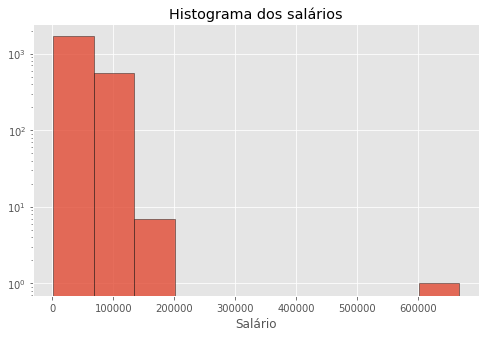

In [ ]:
# A escala logarítmica permite a observação de um valor fora do comum: uma renda maior do que $600.000

tamanho = (8,5)
eixo = 'Salário'
titulo = 'Histograma dos salários'
arquivo = 'histograma dos salários.png'

histogramar_quantitativo(df, 'renda', tamanho, eixo, titulo, logaritmo=True, nome_do_arquivo=arquivo)

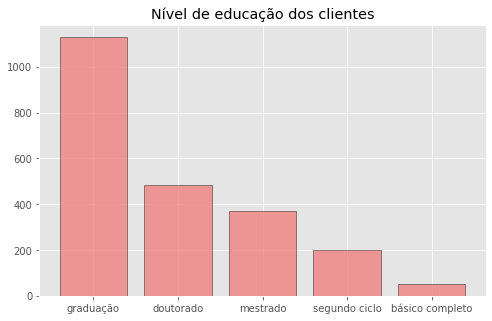

In [ ]:
tamanho = (8,5)
titulo = 'Nível de educação dos clientes'
cor = 'lightcoral'
arquivo = 'Nivel de educação dos clientes.png'

histogramar_qualitativo(df, 'educação', tamanho, titulo, cor=cor, nome_do_arquivo=arquivo)

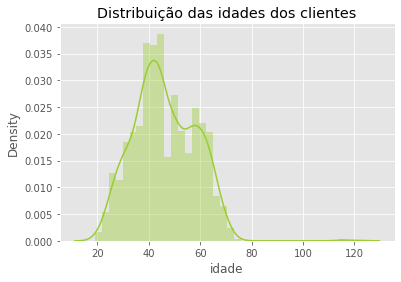

In [ ]:
titulo = 'Distribuição das idades dos clientes'
cor = 'yellowgreen'
arquivo = 'distribuição das idades dos clientes.png'

distribuir(df, 'idade', titulo, cor, arquivo)

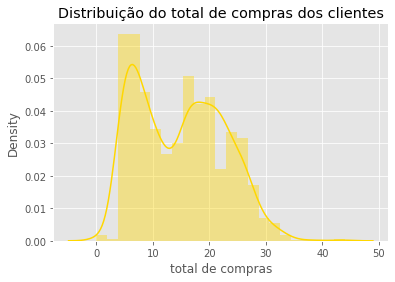

In [ ]:
titulo = 'Distribuição do total de compras dos clientes'
cor = 'gold'
arquivo = 'distribuição do total de compras.png'

distribuir(df, 'total de compras', titulo, cor, arquivo)

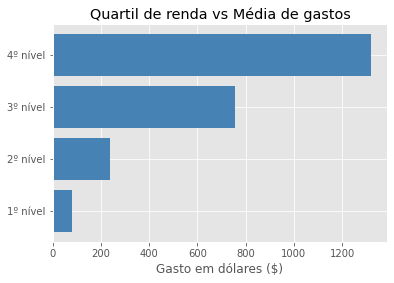

In [ ]:
# Renda por média de produtos vendidos

atributo_1 = 'nível de renda'
atributo_2 = 'gasto total'
cor = 'steelblue'
eixo_x = 'Gasto em dólares ($)'
titulo = 'Quartil de renda vs Média de gastos'
arquivo = 'quartil de renda vs média de gastos.png'

comparar_atributos(df, atributo_1, atributo_2, cor, eixo_x, titulo=titulo, nome_do_arquivo=arquivo)

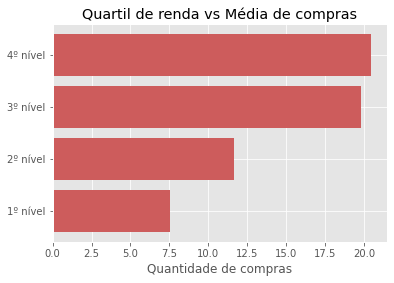

In [ ]:
# Média do tipo de compra por renda

atributo_1 = 'nível de renda'
atributo_2 = 'total de compras'
cor = 'indianred'
eixo_x = 'Quantidade de compras'
titulo = 'Quartil de renda vs Média de compras'
arquivo = 'quartil de renda vs média de compras.png'

comparar_atributos(df, atributo_1, atributo_2, cor, eixo_x, titulo=titulo, nome_do_arquivo=arquivo)

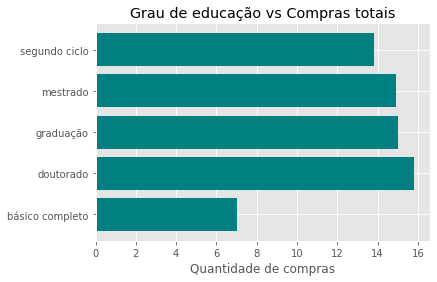

In [ ]:
# Média do tipo de compra por educação

atributo_1 = 'educação'
atributo_2 = 'total de compras'
cor = 'teal'
eixo_x = 'Quantidade de compras'
titulo = 'Grau de educação vs Compras totais'
arquivo = 'grau de educação vs compras totais.png'

comparar_atributos(df, atributo_1, atributo_2, cor, eixo_x, titulo=titulo, nome_do_arquivo=arquivo)

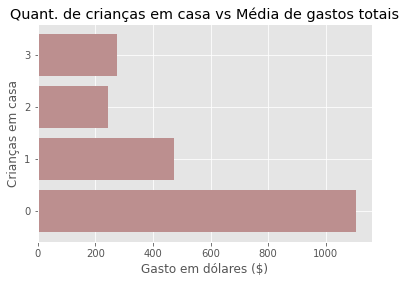

In [ ]:
# Gastos médios por grupo de quantidade de crianças em casa

atributo_1 = 'crianças e adolescentes'
atributo_2 = 'gasto total'
cor = 'rosybrown'
eixo_x = 'Gasto em dólares ($)'
eixo_y = 'Crianças em casa'
pontos_y = df[atributo_1].unique()
titulo = 'Quant. de crianças em casa vs Média de gastos totais'
arquivo = 'crianças em casa vs média de gastos.png'

comparar_atributos(df, atributo_1, atributo_2, cor, eixo_x, eixo_y, pontos_y=pontos_y, titulo=titulo, nome_do_arquivo=arquivo)

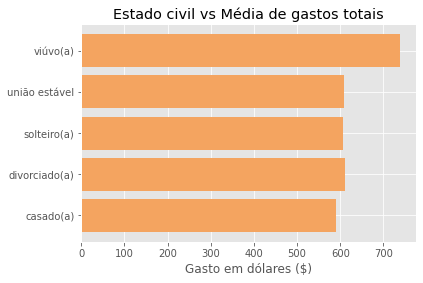

In [ ]:
# Gastos médios por estado civil 

atributo_1 = 'estado civil'
atributo_2 = 'gasto total'
cor = 'sandybrown'
eixo_x = 'Gasto em dólares ($)'
titulo = 'Estado civil vs Média de gastos totais'
arquivo = 'estado civil vs média de gastos.png'

comparar_atributos(df, atributo_1, atributo_2, cor, eixo_x, titulo=titulo, nome_do_arquivo=arquivo)

## Modelagem de dados

### K-Means

Agrupamento k-means é um método de segregar em torno de centros (centroides) diversos dados, criando o que analogamente na química chamamos de clustering que gera o efeito de particionar n observações dentre k grupos onde cada observação pertence ao grupo mais próximo da média.

[Referência](https://minerandodados.com.br/entenda-o-algoritmo-k-means/)

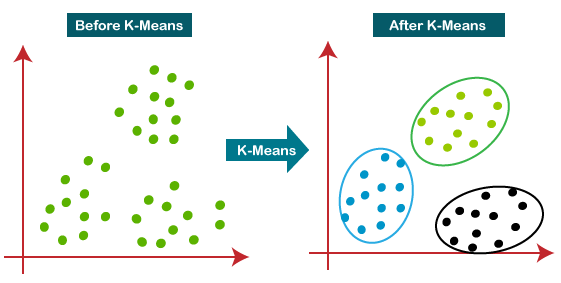

Existe também um método chamado elbow que tenta resolver o problema de melhor escolha do argumento k.

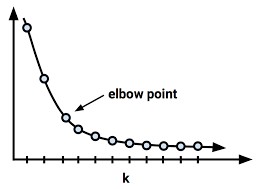

In [ ]:
# Numeração das colunas que eram strings

atributos = ['educação', 'estado civil']

for i in df[atributos]:
  df[i], i = df[i].factorize()

In [ ]:
# Criando uma cópia do dataset, para manipular sem alterar os dados originais

df1 = df.copy()

In [ ]:
# Remoção das colunas indesejadas para o classificador

df1.drop(columns=['ID', 'inscrição', 'nível de renda', 'gasto total', 'total de compras', 'crianças e adolescentes'], inplace=True)

In [ ]:
import random # para setar a semente
import numpy as np # para manipulação de matrizes

np.random.seed(1)

In [ ]:
from sklearn.preprocessing import StandardScaler # para padronizar os dados

padronizador = StandardScaler()
x = padronizador.fit_transform(df1)

In [ ]:
from sklearn.cluster import KMeans # para criar o classificador k-means

# Criação do modelo para a criação de dois grupos de clientes
modeloKMeans = KMeans(n_clusters=2, n_init=50)

# Treinamento do modelo
modeloKMeans.fit(x)

KMeans(n_clusters=2, n_init=50)

In [ ]:
# Persistência do modelo

import pickle
pickle.dump(modeloKMeans, open('modeloKMeans.sav', 'wb'))

In [ ]:
# Predição dos grupos a partir do modelo treinado

cluster = modeloKMeans.predict(x)

In [ ]:
# Criação de um atributo para identificação do grupo do cliente

df1['grupo'] = cluster
df['grupo'] = cluster

In [ ]:
# Análise dos grupos a partir da média de cada atributo

df1.groupby('grupo').mean()

,educação,estado civil,renda,crianças,adolescentes,última compra,gasto em vinhos,gasto em frutas,gasto em carnes,gasto em peixes,gasto em doces,gasto em ouro,compras c/ desconto,compras pela web,compras c/ catálogo,compras na loja física,visitas no site,aceitou - 3,aceitou - 4,aceitou - 5,aceitou - 1,aceitou - 2,reclamação,custo do contato,receita,resposta final,idade
grupo,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.863946,1.511338,72191.199559,0.065760,0.424036,49.472789,606.321995,56.552154,365.362812,80.183673,58.227891,76.615646,1.989796,5.783447,5.365079,8.560091,3.656463,0.081633,0.132653,0.184807,0.155329,0.031746,0.007937,3.0,11.0,0.233560,47.929705
1,1.058910,1.457290,39293.965406,0.689985,0.559647,48.873343,107.540501,6.655376,38.083947,9.819588,6.821797,22.852725,2.542710,2.981591,0.906480,3.991163,6.394698,0.067010,0.036819,0.000000,0.005155,0.001473,0.010309,3.0,11.0,0.094256,45.067010


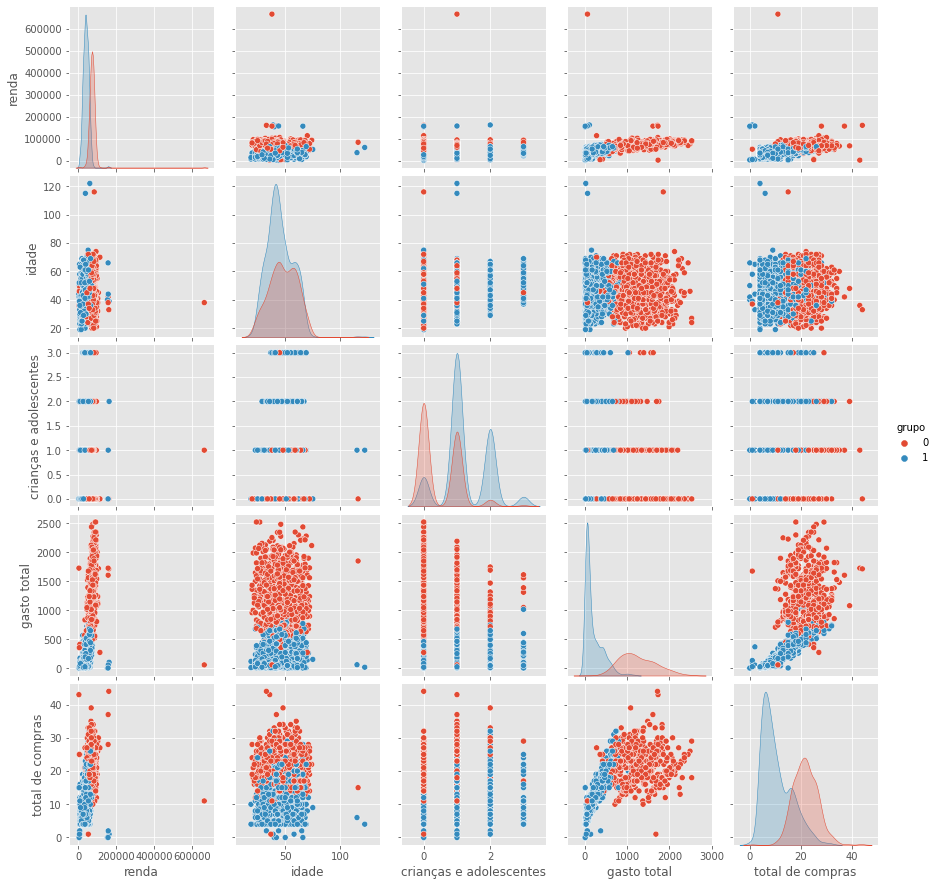

In [ ]:
# Comparação das colunas com o df exploratório 

sns.pairplot(df[['renda','idade','grupo','crianças e adolescentes','gasto total','total de compras']], hue='grupo')
plt.savefig('comparação dos atributos.png', dpi=300)

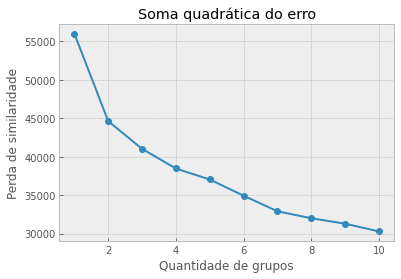

In [ ]:
# Aplicação do método 'elbow' para definir a quantidade de grupos adequada, a partir de um gráfico para a avaliação do modelo, com a semelhança entre os indivíduos de cada grupo em função da quantidade de grupos

tamanho = (6,4)
arquivo = 'soma_quadratica_do_erro.png'

soma_quadratica_erro(df, 'grupo', x, tamanho, estilo='bmh', nome_do_arquivo=arquivo)

Alguns atribuitos estão bem segmentados, provavelmente influenciam mais na decisão do modelo. 

### Árvore de decisão

Como o próprio nome sugere, neste algoritmo vários pontos de decisão serão criados. Estes pontos são os “nós” da árvore e em cada um deles o resultado da decisão será seguir por um caminho, ou por outro. Os caminhos existentes são os “ramos”. Esta é a estrutura básica de uma árvore de decisão. Os nós são responsáveis pelas conferências que irão indicar um ramo ou outro para sequência do fluxo.

[Referência](https://didatica.tech/como-funciona-o-algoritmo-arvore-de-decisao/)

In [ ]:
from sklearn.tree import DecisionTreeClassifier # para o criar o classificador por meio do algoritmo 'Árvore de decisão'
from sklearn.model_selection import train_test_split # para separar o conjunto de dados em treinamento e teste para o modelo
from sklearn import tree # para criar graficamente a árvore de decisão 

In [ ]:
# Divisão do conjunto de dados em atributos e classes. No caso, a classe consiste no Grupo do indivíduo definido anteriormente pelo algoritmo 'k-means'

X = df1.loc[:, df1.columns != 'grupo']
y = df1.loc[:, df1.columns == 'grupo']

In [ ]:
# Criação da variável contendo o conjunto dos atributos padronizados

X_std = padronizador.fit_transform(X)

In [ ]:
# Divisão de atributos e classes em conjuntos de treinamento e de teste (70% e 30%, respectivamente)

X_treino, X_teste, y_treino, y_teste = train_test_split(X_std,y, test_size=0.3)

In [ ]:
# Criação do modelo com o critério: gini; profundidade: três; mínimo de amostras para o nó: 86; e mínimo de amostras para a folha: 33
# Foram escolhidos esses parâmetros para equilibrar perfomance e visibilidade do gráfico

modeloAD = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=86, min_samples_leaf=33)

In [ ]:
# Treinamento do modelo

modeloAD.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=33, min_samples_split=86)

In [ ]:
# Validação cruzada do modelo

validacao_cruzada(modeloAD, X_treino, y_treino)

Acurácia nos k-folds: [0.94936709 0.96202532 0.91139241 0.96202532 0.92405063 0.96202532
 0.96202532 0.93670886 0.96153846 0.91025641 0.91025641 0.94871795
 0.92307692 0.96153846 0.91025641 0.96153846 0.92307692 0.93589744
 0.8974359  0.94871795]
Maior: 0.96 | Média: 0.94 | Desvio: 0.022


In [ ]:
# Persistência do modelo

import pickle
pickle.dump(modeloAD, open('modeloAD.sav', 'wb'))

In [ ]:
# Criação da variável de predição usando o modelo da árvore de decisão

y_pred = modeloAD.predict(X_teste)

In [ ]:
# Classificação da importância de cada atributo para que o modelo realize suas predições

importancias = modeloAD.feature_importances_
importancias = arredondar(importancias, 2)
atributos = df1.columns

dic = {atributos[i]: importancias[i] for i in range(len(importancias))}

imprimir_ordenado(dic)

compras c/ catálogo: 0.81
compras na loja física: 0.08
gasto em carnes: 0.07
gasto em doces: 0.03
renda: 0.01
educação: 0.0
estado civil: 0.0
crianças: 0.0
adolescentes: 0.0
última compra: 0.0
gasto em vinhos: 0.0
gasto em frutas: 0.0
gasto em peixes: 0.0
gasto em ouro: 0.0
compras c/ desconto: 0.0
compras pela web: 0.0
visitas no site: 0.0
aceitou - 3: 0.0
aceitou - 4: 0.0
aceitou - 5: 0.0
aceitou - 1: 0.0
aceitou - 2: 0.0
reclamação: 0.0
custo do contato: 0.0
receita: 0.0
resposta final: 0.0
idade: 0.0


In [ ]:
# Conjunto de dados dividido em atributos padronizados e classe (no caso, o grupo do indivíduo)
instancias, classificacoes = X_std, y

# Nomes dos atributos
atributos = df1.drop('grupo',axis=1).columns

# Nomes das classes
classe = ['0','1']

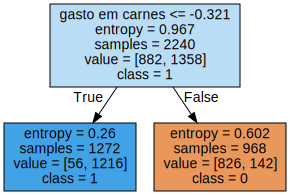

In [ ]:
# Criação de um menu interativo para definição dos parâmetros da árvore de decisão

menu = interactive(arvore_de_decisao,
  criterio = ['gini', 'entropy'],
  no_raiz = ['best', 'random'],
  profundidade = [1, 2, 3, 4, 5, 10, 20, 30],
  min_amostras_no = (1, 100),
  min_amostras_folha = (1, 100))

display(menu)

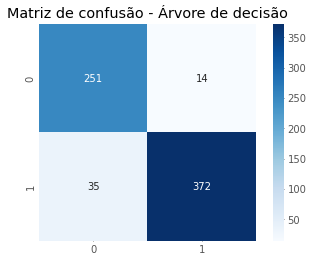

In [ ]:
# Matriz de confusão do modelo de árvore de decisão

titulo = 'Matriz de confusão - Árvore de decisão'

mapa_de_calor(y_teste, y_pred, titulo=titulo)

In [ ]:
# Avaliação do modelo de árvore de decisão

avaliacao(y_teste, y_pred)

f1: 93.82%
precisão: 96.37%
revocação: 91.4%
acurácia: 92.71%


## SVM

O SVM funciona mapeando dados para um grande espaço de recursos para que os pontos de dados possam ser categorizados, mesmo se os dados não puderem ser separados linearmente. Um separador entre as categorias é detectado e os dados são transformados para que o separador possa ser extraído como um hiperplano.

***Referência [IBM](https://www.ibm.com/docs/es/spss-modeler/SaaS?topic=models-how-svm-works)***

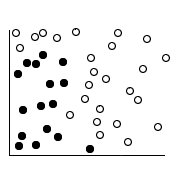

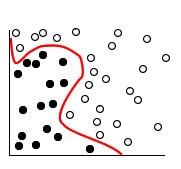

In [ ]:
from sklearn import svm # para aplicação do método de aprendizagem de máquina supervisionado 'Support Vector Machine'

In [ ]:
# Divisão do conjunto de dados em atributos e classes. No caso, a classe consiste no Grupo do indivíduo definido anteriormente pelo algoritmo 'k-means'

X = df1.drop('grupo', axis = 1)
y = df1['grupo']

In [ ]:
# Padronização dos dados

X_std = padronizador.fit_transform(X)

In [ ]:
# Divisão de atributos e classes em conjuntos de treinamento e de teste (70% e 30%, respectivamente)

X_treino, X_teste, y_treino, y_teste = train_test_split(X_std, y, test_size=0.3,random_state=109)

In [ ]:
# Criação do classificador SVM
modeloSVM = svm.SVC(kernel='linear', probability=True) # Linear Kernel

# Treino do modelo
modeloSVM.fit(X_treino, y_treino)

# Predições 
y_pred = modeloSVM.predict(X_teste)

In [ ]:
# Validação cruzada do modelo

validacao_cruzada(modeloSVM, X_treino, y_treino, 7)

Acurácia nos k-folds: [0.99107143 1.         0.99553571 0.99107143 0.98660714 0.98660714
 0.98660714]
Maior: 1.0 | Média: 0.99 | Desvio: 0.0048


In [ ]:
# Persistência do modelo

import pickle
pickle.dump(modeloSVM, open('modeloSVM.sav', 'wb'))

In [ ]:
# Avaliação do modelo SVM

avaliacao(y_teste, y_pred)

f1: 99.63%
precisão: 99.5%
revocação: 99.75%
acurácia: 99.55%


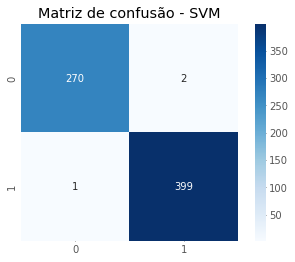

In [ ]:
# Matriz de confusão do modelo SVM

titulo = 'Matriz de confusão - SVM'

mapa_de_calor(y_teste, y_pred, titulo=titulo)

## Shap

In [ ]:
import shap

explainer = shap.KernelExplainer(modeloSVM.predict_proba, X_treino, link="logit")
shap_values = explainer.shap_values(X_teste, nsamples=50)

Using 1568 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/672 [00:00<?, ?it/s]

In [ ]:
# print the JS visualization code to the notebook
shap.initjs()

shap.force_plot(explainer.expected_value[1], shap_values[1][1,:], X_teste[1], link="logit")

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], X_teste, link="logit")

***Com os modelos podemos dividir o cliente em dois grupos, e partir disso inferir estratégias específicas para o cliente.***



Referências:

https://www.kaggle.com/imakash3011/customer-personality-analysis?select=marketing_campaign.csv

https://minerandodados.com.br/entenda-o-algoritmo-k-means/

https://www.ibm.com/docs/es/spss-modeler/SaaS?topic=trees-decision-tree-models

https://github.com/slundberg/shap

https://www.ibm.com/docs/es/spss-modeler/SaaS?topic=models-how-svm-works

https://dataml.com.br/validacao-cruzada-aninhada-com-scikit-learn/

Estatistica Prática para Ciencia de Dados - Peter Bruce & Andrew Bruce

Mãos à Obra: Aprendizado de Máquina com Scikit-Learn & TensorFlow - Aurelien Geron

Storytelling com dados - Cole Nussbaumer
